# Predicting used car prices

In this notebook, I'll work with the [Kaggle](https://www.kaggle.com/avikasliwal/used-cars-price-prediction) dataset about used cars and their prices. The notebook first includes exploration of the dataset followed by prediction of prices.

## Import libraries

I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [137]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Read dataset

I'll read the dataset and get information about it.

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cars.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Let's first split the dataset into train and test datasets.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4189 non-null   object 
 10  Power              4189 non-null   object 
 11  Seats              4185 non-null   float64
 12  New_Price          580 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 460.8+ KB


**Feature Enginering**

Explanation is attached with the actions.

converting datatype

In [141]:
#converting object data type to category data type
dataset["Fuel_Type"] = dataset["Fuel_Type"].astype("category")
dataset["Transmission"] = dataset["Transmission"].astype("category")
dataset["Owner_Type"] = dataset["Owner_Type"].astype("category")


In [142]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.5,3009.00,4513.50,6018.0
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


**Processing Years to Derive Age of car**

Since year has 2014, 1996 etc. But this will not help to understand how old cars is and its effect on price. so creating two new columns current year and Age . Current year would be 2023 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns

In [143]:
dataset['Current_year']=2023
dataset['Ageofcar']=dataset['Current_year']-dataset['Year']
dataset.drop('Current_year',axis=1,inplace=True)
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10


**Processing Name column**

In [144]:
dataset.dropna(subset=['Name'], inplace=True)


In [145]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand
dataset['Brand'] = dataset['Name'].str.split(' ').str[0] #Separating Brand name from the Name
dataset['Model'] = dataset['Name'].str.split(' ').str[1] + dataset['Name'].str.split(' ').str[2]

In [146]:
dataset.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [147]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
dataset[dataset.Brand.isin(col)].sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Ageofcar,Brand,Model
3410,3410,Land Rover Freelander 2 HSE SD4,Ahmedabad,2012,60000,Diesel,Automatic,Second,12.35 kmpl,2179 CC,187.74 bhp,5.0,NaN,23.50,11,Land,RoverFreelander
410,410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.67,9,Land,RoverRange
4687,4687,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,16.50,11,Land,RoverFreelander
4247,4247,Land Rover Freelander 2 SE,Ahmedabad,2012,75000,Diesel,Automatic,Second,12.39 kmpl,2179 CC,147.51 bhp,5.0,NaN,17.50,11,Land,RoverFreelander
3043,3043,Land Rover Discovery Sport TD4 HSE,Coimbatore,2019,25899,Diesel,Automatic,First,12.63 kmpl,2179 CC,147.5 bhp,5.0,NaN,55.70,4,Land,RoverDiscovery


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         6019 non-null   int64   
 1   Name               6019 non-null   object  
 2   Location           6019 non-null   object  
 3   Year               6019 non-null   int64   
 4   Kilometers_Driven  6019 non-null   int64   
 5   Fuel_Type          6019 non-null   category
 6   Transmission       6019 non-null   category
 7   Owner_Type         6019 non-null   category
 8   Mileage            6017 non-null   object  
 9   Engine             5983 non-null   object  
 10  Power              5983 non-null   object  
 11  Seats              5977 non-null   float64 
 12  New_Price          824 non-null    object  
 13  Price              6019 non-null   float64 
 14  Ageofcar           6019 non-null   int64   
 15  Brand              6019 non-null   object  
 16  Model 

In [149]:
#changing brandnames
dataset.loc[dataset.Brand == 'ISUZU','Brand']='Isuzu'
dataset.loc[dataset.Brand=='Mini','Brand']='Mini Cooper'
dataset.loc[dataset.Brand=='Land','Brand']='Land Rover'
#dataset['Brand']=dataset["Brand"].astype("category")

In [150]:
dataset.Brand.nunique()

30

In [151]:
dataset.groupby(dataset.Brand).size().sort_values(ascending =False)

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini Cooper        26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Smart               1
Bentley             1
Ambassador          1
dtype: int64

There are 30 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [152]:
dataset.Model.isnull().sum()

0

In [153]:
dataset.Model.nunique()

689

In [154]:
dataset.groupby('Model')['Model'].size().nlargest(30)

Model
WagonR          154
Grandi10        152
SwiftDzire      152
Innova2.5       114
Verna1.6        110
Cityi           100
City1.5          99
3Series          98
NewC-Class       94
Creta1.6         87
SwiftVDI         83
5Series          68
i10Sportz        65
XUV500W8         64
i201.2           64
SantroXing       62
AmazeS           58
i10Magna         57
FigoDiesel       54
Alto800          52
CorollaAltis     52
A42.0            48
Ecosport1.5      48
i20Asta          47
i20Sportz        47
InnovaCrysta     46
AltoK10          45
Duster110PS      45
Fortuner4x2      43
VitaraBrezza     43
Name: Model, dtype: int64

There are 689 unique models and Wagon R is most popular Model.

## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

In [155]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Name

Let's explore the various cars in the dataset.

In [156]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: Name, Length: 1592, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [157]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [158]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

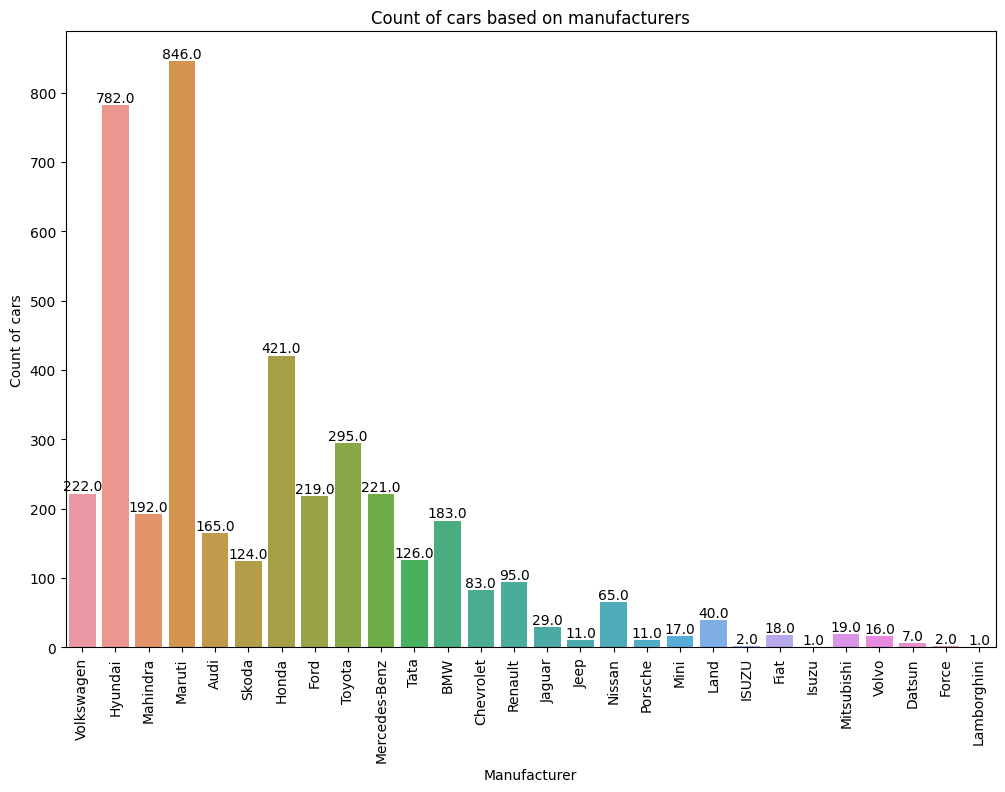

In [159]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [160]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [161]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [162]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Fuel_Type, Transmission,  and Owner_Type

All these columns are categorical columns which should be converted to dummy variables before being used.

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [163]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [164]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

Let's check for missing values.

In [165]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


There is one missing value in each. I'll replace the missing value with the mean value of the column based on the training data.

In [166]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [167]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [168]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### New Price

As most of the values are missing, I'll drop this column altogether.

In [169]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [170]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [171]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [172]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [173]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

**1st Model;**

In [174]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7008908549416727

**2nd Model**

In [175]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8858723732344661

The **Random Forest** model performed the best with a R2 score of **0.88**.

**Insights/Suggestions**

**Observations**


*   Expensive cars are in Coimbatore and Banglore.
*   2 Seater cars are more expensive.
*   Deisel Fuel type car are more expensive compared to other fuel type.
*   As expected, Older model are sold cheaper compared to latest model
*   Automatic transmission vehicle have a higher price than manual transmission vehicles.
*   Vehicles with more engine capacity have higher prices.
*   Price decreases as number of owner increases.
*   Automatic transmission require high engine and power.
*   Prices for Cars with fuel type as Deisel has increased with recent models
*   Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

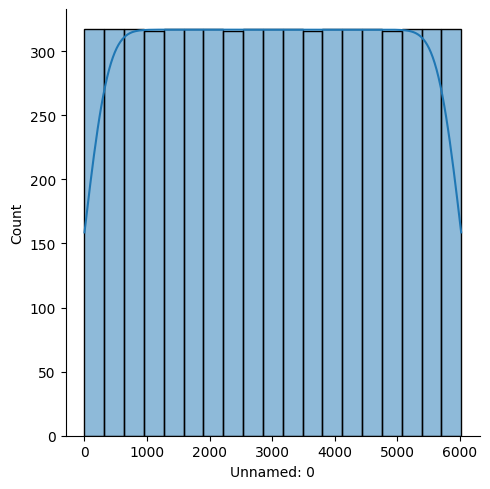

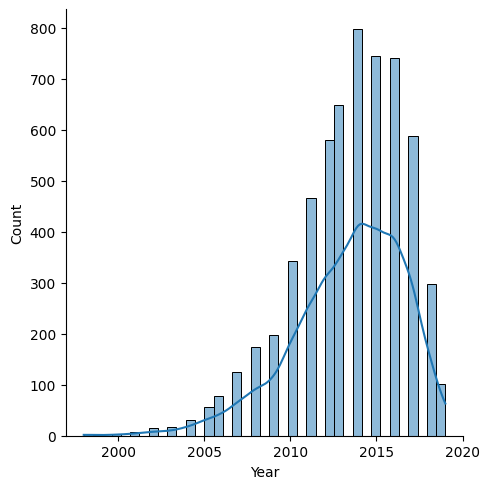

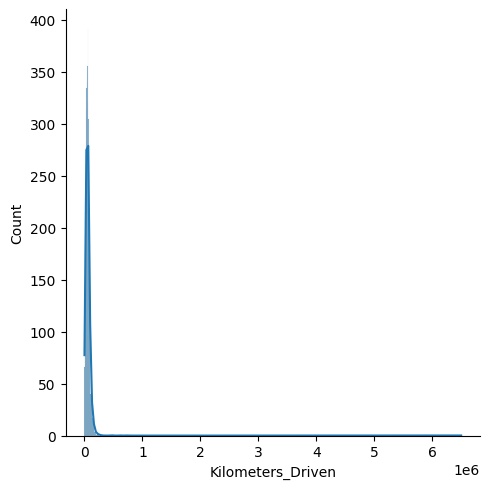

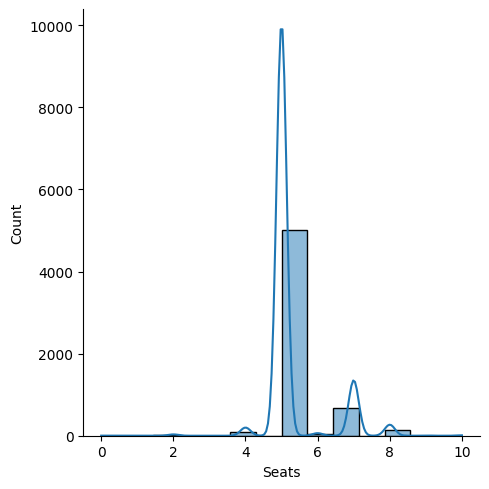

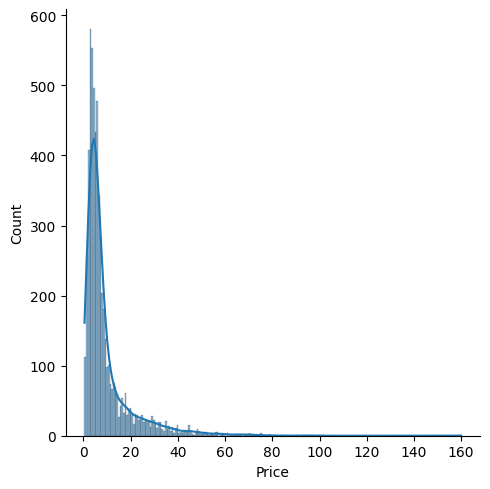

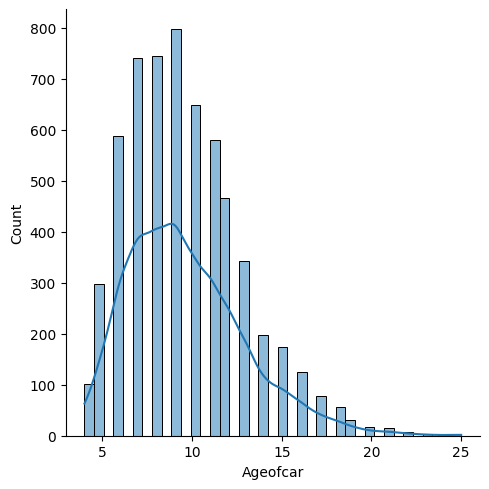

In [176]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = dataset.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.displot(dataset[colname], kde=True)
    plt.show()

In [177]:
def Perform_log_transform(dataset,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        dataset[colname + '_log'] = np.log(dataset[colname])
    #df.drop(col_log, axis=1, inplace=True)
    dataset.info()

In [178]:
#This needs to be done before the data is split
Perform_log_transform(dataset,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             6019 non-null   int64   
 1   Name                   6019 non-null   object  
 2   Location               6019 non-null   object  
 3   Year                   6019 non-null   int64   
 4   Kilometers_Driven      6019 non-null   int64   
 5   Fuel_Type              6019 non-null   category
 6   Transmission           6019 non-null   category
 7   Owner_Type             6019 non-null   category
 8   Mileage                6017 non-null   object  
 9   Engine                 5983 non-null   object  
 10  Power                  5983 non-null   object  
 11  Seats                  5977 non-null   float64 
 12  New_Price              824 non-null    object  
 13  Price                  6019 non-null   float64 
 14  Ageofcar               6019 non-null   i

**Important points**

There are more soft parameters which also should be considered when buying a car, the wear and tear the car has been through and how much the company will have to work on car to make it ready for sale.

If the car as already been in some kind of accident that would also effect the price.

Other good to have feature like AC,Moon roof,Airbags can also have impact on the price.

Car model that are too old will depreciate a lot can impact the demand .